# IPPR EXPT 3
##Experiment No.3
##Image smoothing and sharpening
###NAME - SWARNABH GAJBHIYE
###PRN - 1032211392

##AIM:
A. To study spatial domain low pass filtering of an image with mean, median filters.
Compare the performance of these two filters. Observe the effect of varying mask size on
the filtered image.

B. To study spatial domain high pass filtering of an image with sharpening filter.


##Result:
The mean filter effectively reduces noise in images but tends to blur edges, especially with larger mask sizes. In contrast, the median filter excels in noise reduction while preserving edge details.

#Conclusion:
 Selecting the appropriate filter is crucial for achieving desired image processing outcomes. While the mean filter is suitable for general noise reduction, the median filter is preferable when edge preservation is essential, such as in medical imaging or object recognition tasks. Understanding the trade-offs between filters enables practitioners to make informed decisions for optimal image enhancement.

PART A

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Function to add salt and pepper noise to an image
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_mask = np.random.rand(*image.shape) < salt_prob
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0
    return noisy_image

In [7]:
# Read the grayscale image
image = cv2.imread('/content/your-normal-isnt-the-worlds-normal-wyanne.jpg', cv2.IMREAD_GRAYSCALE)

# Add noise to the image
noisy_image = add_salt_pepper_noise(image, 0.02, 0.02)  # Example probabilities

# Apply averaging filter (mean) on the image
averaged_image = cv2.blur(noisy_image, (3, 3))  # Using a 3x3 kernel


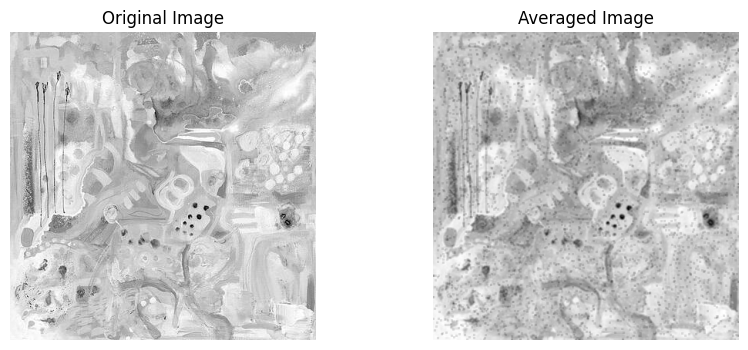

In [18]:
# Display original and filtered images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(averaged_image, cmap='gray')
plt.title('Averaged Image')
plt.axis('off')

plt.show()

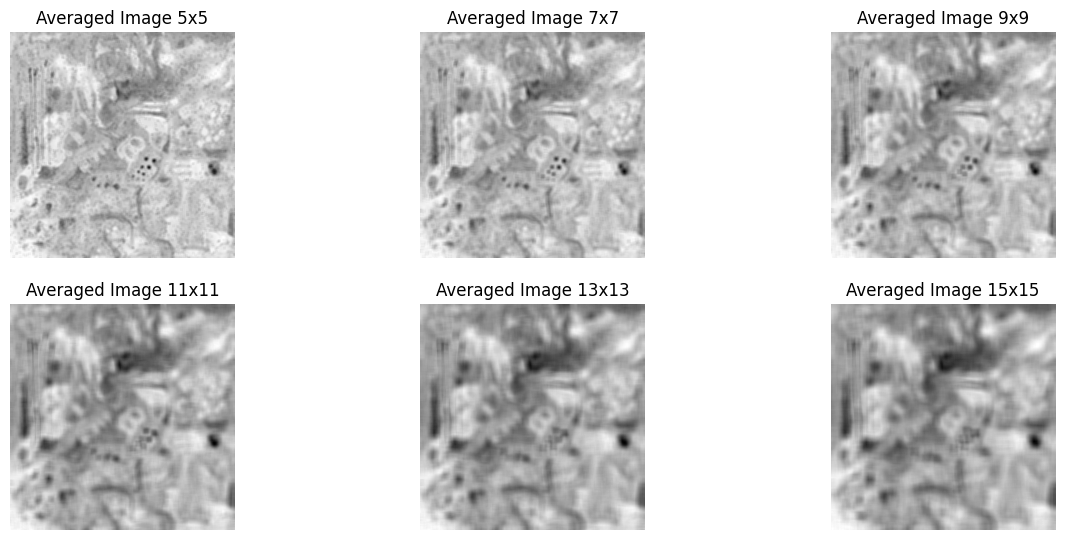

In [19]:
# Vary mask size from 5x5 to 15x15 and display filtered images
plt.figure(figsize=(15, 10))
for idx, mask_size in enumerate(range(5, 16, 2), start=1):
    blurred_image = cv2.blur(noisy_image, (mask_size, mask_size))
    plt.subplot(3, 3, idx)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'Averaged Image {mask_size}x{mask_size}')
    plt.axis('off')

plt.show()

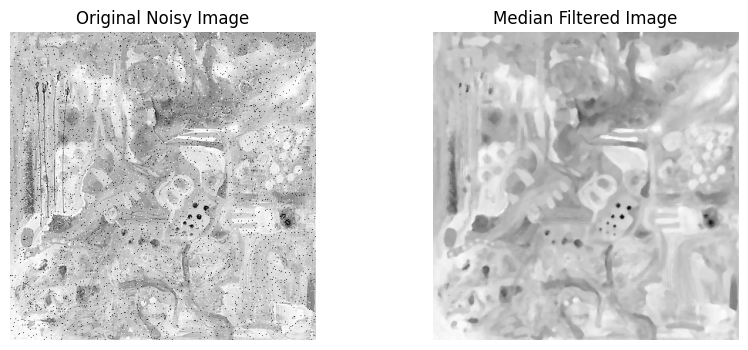

In [20]:
# Apply Median filter on the noisy image
median_filtered_image = cv2.medianBlur(noisy_image, 5)

# Display original and filtered images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()

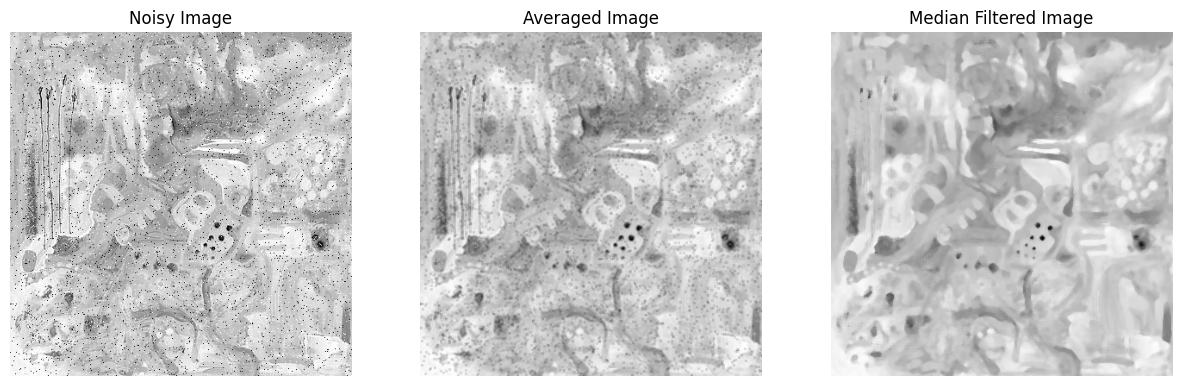

In [21]:
# Display original, averaged, and median filtered images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(averaged_image, cmap='gray')
plt.title('Averaged Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()


The median filtered image shows clearer edges and finer details compared to the averaging filtered image, indicating its superior performance in noise reduction while preserving image quality.

Part b


In [22]:
# Apply sharpening filter on the given image
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)


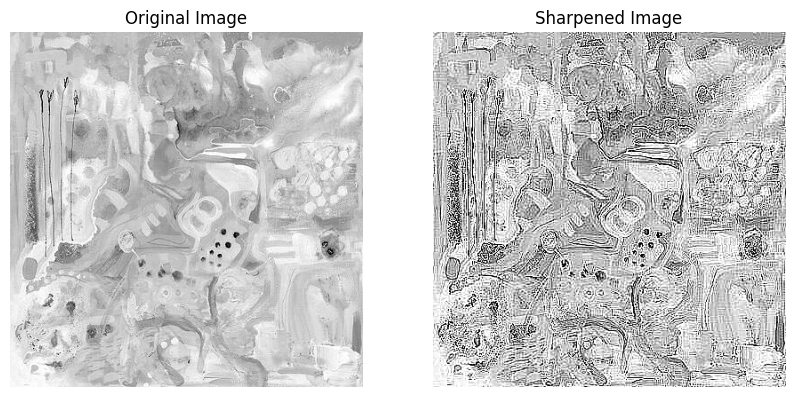

In [23]:
# Display original and sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.show()

In [29]:
# Function to add salt and pepper noise to an image
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_mask = np.random.rand(*image.shape) < salt_prob
    pepper_mask = np.random.rand(*image.shape) < pepper_prob
    noisy_image[salt_mask] = 255
    noisy_image[pepper_mask] = 0
    return noisy_image

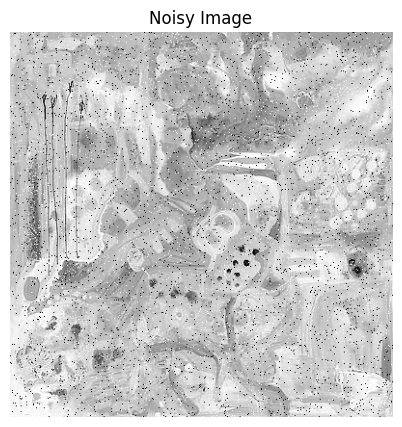

In [30]:
# Add salt and pepper noise to the image
noisy_image = add_salt_pepper_noise(image, 0.02, 0.02)  # Example probabilities

# Display noisy image
plt.figure(figsize=(5, 5))
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

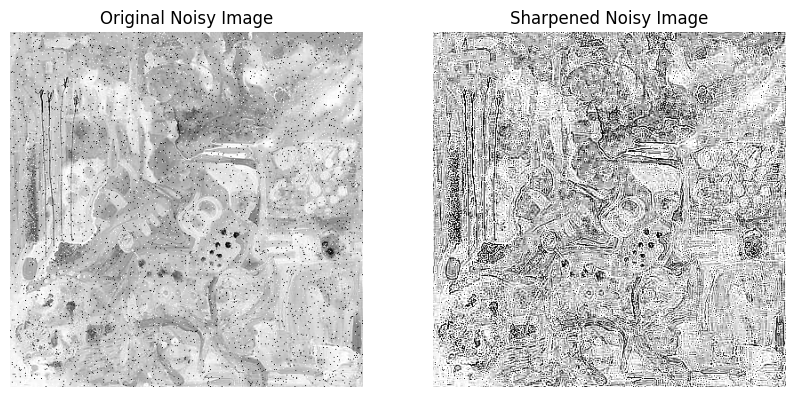

In [31]:
# Apply sharpening filter on the noisy image
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_noisy_image = cv2.filter2D(noisy_image, -1, kernel_sharpening)

# Display original noisy image and sharpened noisy image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_noisy_image, cmap='gray')
plt.title('Sharpened Noisy Image')
plt.axis('off')

plt.show()


In step 3, applying the sharpening filter to the original image noticeably enhanced edge clarity and overall detail. However, in step 5, when the same filter was applied to the noisy image, while some details were sharpened, the noise in the image became more prominent, potentially compromising visual quality. Therefore, caution should be exercised when applying sharpening filters to noisy images to prevent exacerbating noise-related artifacts.

#Post Lab questions

##Q1. Write a note on Sharpening Filters.

answer = Sharpening filters are image processing techniques used to enhance the clarity and detail of an image by emphasizing edges and fine features. These filters work by increasing the contrast of pixels in regions where there is a significant change in intensity, thereby making edges appear sharper. Commonly used sharpening filters include the Laplacian filter, the Sobel filter, and the unsharp mask filter. While sharpening filters can improve the visual quality of an image, they can also amplify noise and other artifacts present in the image, so their application should be carefully controlled.



##Q2. Consider an input image row [4 3 2 1] with intensity values in the range 0 to 15. Detrmine negative of the image row.

answer = To determine the negative of the image row [4 3 2 1] with intensity values in the range 0 to 15, we need to subtract each intensity value from the maximum possible intensity value in the range (15 in this case).

Therefore, the negative of the image row would be:

[15-4 15-3 15-2 15-1] = [11 12 13 14].

##Q3. 3. Determine the new value of the central pixel of the following image by applying 3x3 size:
###a) Mean filter   
###b) Median filter   
###c) Mode filter

##10 11 11

##10 255 11

##12 12 11

Answer =

a) Mean Filter:
For the mean filter, we calculate the average value of all the pixels in the 3x3 neighborhood centered around the central pixel.

New value = (10 + 11 + 11 + 10 + 255 + 11 + 12 + 12 + 11) / 9

= 344 / 9

≈ 38.22 (rounded to the nearest integer)

---

b) Median Filter:
For the median filter, we calculate the median value of all the pixels in the 3x3 neighborhood centered around the central pixel.

After arranging the pixel values in ascending order:
[10, 10, 11, 11, 11, 11, 11, 12, 12, 255]

New value = Median([10, 10, 11, 11, 11, 11, 11, 12, 12, 255])

= Median([10, 10, 11, 11, 11, 11, 11, 12, 12, 255])

= 11

---

c) Mode Filter:
For the mode filter, we find the most frequently occurring value (mode) among all the pixels in the 3x3 neighborhood centered around the central pixel.


New value = Mode([10, 11, 11, 10, 255, 11, 12, 12, 11])
= 11

---

Therefore, the new values of the central pixel using each filter are:

a) Mean Filter: 38 (rounded)

b) Median Filter: 11

c) Mode Filter: 11

